# **Reservation Cancellation Prediction (Neural Network)**

##<font color = red> **Part A - EDA, Pre-processing, and Model Building**</font>  

**Description**

In this assignment, I will use the dataset to predict whether costumers will cancel their reservations.

### **<font color = blue>Step 1 : Import Data**

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/My Drive/Colab Notebook/QBS HW1/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x_train = pd.read_csv(base_dir +"train.csv", usecols = range(15))
x_test = pd.read_csv(base_dir +"test.csv")
y_train = pd.read_csv(base_dir +"train.csv", usecols = [15])

# Combine x_train and x_test in order to explore data and tackle with missing value later
x_data = x_train.append(x_test)

<ipython-input-4-e7d08cb7948d>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_data = x_train.append(x_test)


In [ ]:
x_data.head()

,ID,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country
0,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
1,5,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States
2,6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
3,7,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States
4,10,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States


In [ ]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 19327
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              48842 non-null  int64 
 1   Age             48842 non-null  int64 
 2   Workclass       46043 non-null  object
 3   fnlwgt          48842 non-null  int64 
 4   Education       48842 non-null  object
 5   Education_Num   48842 non-null  int64 
 6   Martial_Status  48842 non-null  object
 7   Occupation      46033 non-null  object
 8   Relationship    48842 non-null  object
 9   Race            48842 non-null  object
 10  Sex             48842 non-null  object
 11  Capital_Gain    48842 non-null  int64 
 12  Capital_Loss    48842 non-null  int64 
 13  Hours_per_week  48842 non-null  int64 
 14  Country         47985 non-null  object
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


From the info above, we know that we need to at least deal with the following things.
1. Missing value: Workclass, Occupation, Country
2. Categorized data: Workclass, Education, Martial_Status, Occupation, Relationship, Race,
Sex, Country

### **<font color = blue> Step 2: Data exploring and preprocessing**

I only included the parts that I adjusted the data. The other explorations are included in the report only.

<font color = blue> 1. Correlation table --- delete *ID* and *fnlgwt*</font>  

First of all, I'd like to check the correlation table to see the correlation within features and
also the relationship with target.

In [ ]:
# Combine x_train and y_train into train_data
train_data = pd.concat([x_train, y_train], axis = 1)
train_data.head(2)

,ID,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
1,5,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [ ]:
# See the correlation table
train_data.corr(method = 'pearson')

<ipython-input-8-52ae21fc708d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr(method = 'pearson')


,ID,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target
ID,1.000000,-0.010074,-0.001478,-0.010577,-0.001629,-0.001193,0.000050,0.000871
Age,-0.010074,1.000000,-0.081941,-0.008544,0.067013,0.052337,0.063897,0.168381
fnlwgt,-0.001478,-0.081941,1.000000,-0.050178,-0.007749,-0.011357,-0.011707,-0.010398
Education_Num,-0.010577,-0.008544,-0.050178,1.000000,0.093034,0.061480,0.117537,0.253277
Capital_Gain,-0.001629,0.067013,-0.007749,0.093034,1.000000,-0.022272,0.054600,0.234683
Capital_Loss,-0.001193,0.052337,-0.011357,0.061480,-0.022272,1.000000,0.046495,0.129586
Hours_per_week,0.000050,0.063897,-0.011707,0.117537,0.054600,0.046495,1.000000,0.168797
Target,0.000871,0.168381,-0.010398,0.253277,0.234683,0.129586,0.168797,1.000000


From above table, I found that within the numerical variables, there is no variable highly related to the other, so I didn't tackle with the colinearity problem here. Next, it's reasonable to
remove ID since that's only the recognition for each data and shouldn't contribute to the result.
Also, I'd like to remove fnlgwt as well deu to the extremely low correlation with the target. From
this table, it also shows that Education_Num and Capital_gain have higher correlation with
Target.

In [ ]:
# Drop ID and fnlwgt features due to extremely low correlation with target
x_data = x_data.drop("ID", axis = 1)
x_data = x_data.drop("fnlwgt", axis = 1)

pd.set_option('display.max_info_columns',13)
x_data.head(2)

,Age,Workclass,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country
0,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
1,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


<font color = blue> 2. *Age* --- no adjustment

There are no missing values in Age. And I'd like to explore it by plotting the distribution.

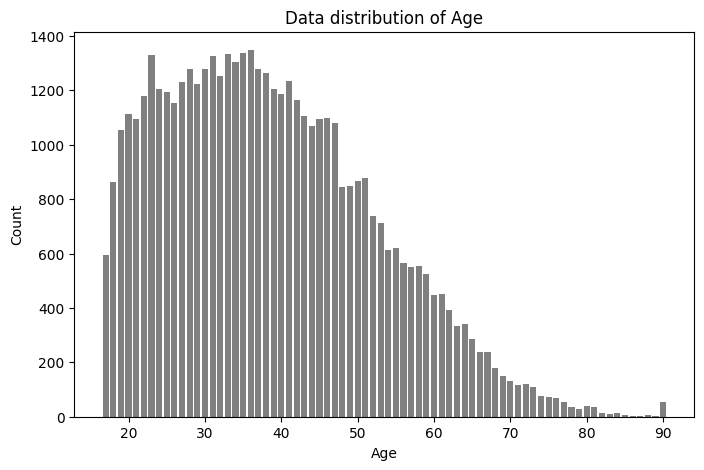

In [ ]:
# Calculate the number of people in each age and plot
age_x = x_data['Age'].value_counts(dropna=False).sort_index().keys().to_list()
age_cnt = x_data['Age'].value_counts(dropna=False).sort_index().to_list()
plt.figure(figsize=(8,5))
plt.bar(age_x, age_cnt, color='grey')
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Data distribution of Age')
plt.show()
plt.close()

The bar chart shows that the distribution concentrated in 20-50 years old and there're only few samples beyond 80 years old. Because it's a continuous variable and has a not bad distribution, I decided not to adjust it.

<font color = blue> 3. *Workclass* --- dealing with missing value and group the classes

In [ ]:
# Observe the categories of Workclass
print(x_data['Workclass'].value_counts(dropna=False))

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
NaN                   2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: Workclass, dtype: int64


It shows that there are 2799 missing values. Since the number of missing value is not too low, I'll group them into a new class called Others. Withour-pay and Never-worked only account for a small proportion to WorkClass, so I will group them into Others as well.

Due to some similarity within those classes, I'll group them into three groups in total, which are Gov, Self, and Others.

In [ ]:
# Fill nan with Others and group the data into Gov, Self, and Others

x_data['Workclass'] = x_data['Workclass'].fillna(value = ' Others')
Gov = [' Local-gov',' Federal-gov',' State-gov']
Self = [' Self-emp-not-inc',' Self-emp-inc']
Others = [' Without-pay',' Never-worked']
x_data['Workclass'] = x_data['Workclass'].replace(Gov, ' Gov')
x_data['Workclass'] = x_data['Workclass'].replace(Self, ' Self')
x_data['Workclass'] = x_data['Workclass'].replace(Others, ' Others')

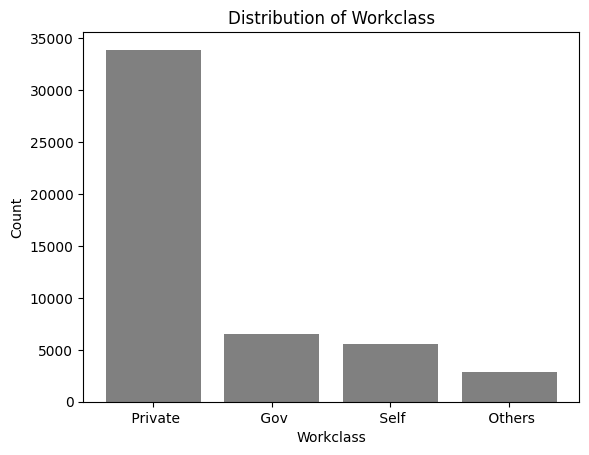

In [ ]:
# Plot the result after grouping
workclass_x = x_data['Workclass'].value_counts().keys().to_list()
workclass_num = x_data['Workclass'].value_counts().to_list()

plt.bar( workclass_x, workclass_num, color = 'grey')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Distribution of Workclass')
plt.show()
plt.close()

<font color = blue>  4. *Education* & *Education_Num* & *Hours_per_week* --- delete Education to prevent colinearity and do feature engineering

In [ ]:
# Observe the categories of Education and the counts
x_data['Education'].value_counts(dropna=False)

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: Education, dtype: int64

In [ ]:
# Test if Education and Education_Num are 1 to 1 mapping
print("Doctorate: ", x_data.loc[ x_data.Education == ' Doctorate']['Education_Num'].value_counts())
print("Prof-school: ", x_data.loc[ x_data.Education == ' Prof-school']['Education_Num'].value_counts())
print("Masters: ", x_data.loc[ x_data.Education == ' Masters']['Education_Num'].value_counts())
print("Bachelors: ", x_data.loc[ x_data.Education == ' Bachelors']['Education_Num'].value_counts())
print("Assoc-acdm: ", x_data.loc[ x_data.Education == ' Assoc-acdm']['Education_Num'].value_counts())
print("Assoc-voc: ", x_data.loc[ x_data.Education == ' Assoc-voc']['Education_Num'].value_counts())
print("Some-college: ", x_data.loc[ x_data.Education == ' Some-college']['Education_Num'].value_counts())
print("HS-grad: ",x_data.loc[ x_data.Education == ' HS-grad']['Education_Num'].value_counts())
print("12th: ", x_data.loc[ x_data.Education == ' 12th']['Education_Num'].value_counts())
print("11th: ", x_data.loc[ x_data.Education == ' 11th']['Education_Num'].value_counts())
print("10th: ", x_data.loc[ x_data.Education == ' 10th']['Education_Num'].value_counts())
print("9th: ", x_data.loc[ x_data.Education == ' 9th']['Education_Num'].value_counts())
print("7th-8th: ", x_data.loc[ x_data.Education == ' 7th-8th']['Education_Num'].value_counts())
print("5th-6th: ", x_data.loc[ x_data.Education == ' 5th-6th']['Education_Num'].value_counts())
print("1st-4th: ", x_data.loc[ x_data.Education == ' 1st-4th']['Education_Num'].value_counts())
print("Preschool: ", x_data.loc[ x_data.Education == ' Preschool']['Education_Num'].value_counts())

Doctorate:  16    594
Name: Education_Num, dtype: int64
Prof-school:  15    834
Name: Education_Num, dtype: int64
Masters:  14    2657
Name: Education_Num, dtype: int64
Bachelors:  13    8025
Name: Education_Num, dtype: int64
Assoc-acdm:  12    1601
Name: Education_Num, dtype: int64
Assoc-voc:  11    2061
Name: Education_Num, dtype: int64
Some-college:  10    10878
Name: Education_Num, dtype: int64
HS-grad:  9    15784
Name: Education_Num, dtype: int64
12th:  8    657
Name: Education_Num, dtype: int64
11th:  7    1812
Name: Education_Num, dtype: int64
10th:  6    1389
Name: Education_Num, dtype: int64
9th:  5    756
Name: Education_Num, dtype: int64
7th-8th:  4    955
Name: Education_Num, dtype: int64
5th-6th:  3    509
Name: Education_Num, dtype: int64
1st-4th:  2    247
Name: Education_Num, dtype: int64
Preschool:  1    83
Name: Education_Num, dtype: int64


From the above, it is known that Education and Education_Num is 1 to 1 mapping. Therefore, I only need one of them as feature and I decided to delete Education_Num. (Besides, by observation, it is noticeable that the higher number of Education_Num implies higher
education level.)

In [ ]:
# Delete Education column from data set because they are 1 to 1 mapping
x_data = x_data.drop("Education", axis = 1)

From the correlation table, I found that Education_Num and Hours_per_week have higher correlation with Target.   
    Hence, I'd like to add a cross-multiplying terms as Edu*Hr.

In [ ]:
x_data['Edu*Hr'] = x_data['Education_Num']*x_data['Hours_per_week']
x_data.head()

,Age,Workclass,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Edu*Hr
0,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,450
1,18,Others,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,300
2,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,180
3,29,Others,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,360
4,55,Private,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,40


After grouping, the gap between the numbers of each group became smaller.

<font color = blue> 5. *Martial_Status* --- dealing with missing value and group the data

In [ ]:
# Observe the categories of Martial_Status
x_data['Martial_Status'].value_counts(dropna = False)

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: Martial_Status, dtype: int64

Since the number of *Married-spouse-absent* and *Married-AF-spouse* are relatively low, I group them with *Married-civ-spouse* into the group *Married*.

In [ ]:
# Group the data
Married = [' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse']
x_data['Martial_Status'] = x_data['Martial_Status'].replace(Married, ' Married')

In [ ]:
x_data['Martial_Status'].value_counts(dropna = False)

 Married          23044
 Never-married    16117
 Divorced          6633
 Separated         1530
 Widowed           1518
Name: Martial_Status, dtype: int64

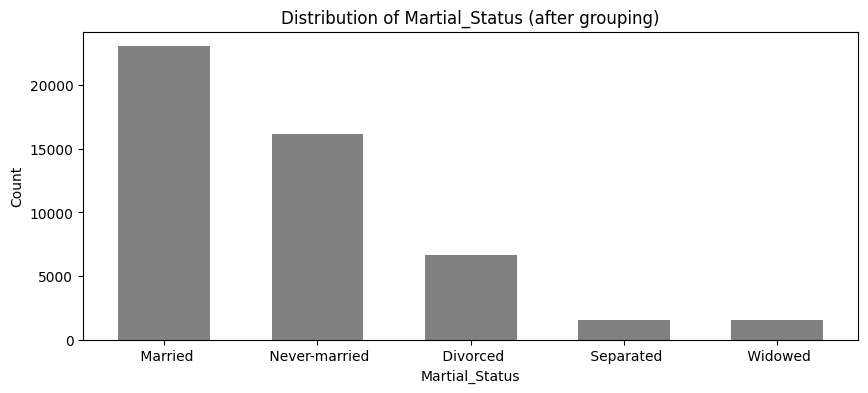

In [ ]:
# Plot the result after grouping
mar_x = x_data['Martial_Status'].value_counts(dropna = False).keys().to_list()
mar_cnt = x_data['Martial_Status'].value_counts(dropna = False).to_list()

plt.figure(figsize=(10,4))
plt.bar( mar_x, mar_cnt, color = 'grey', width = 0.6)
plt.xlabel('Martial_Status')
plt.ylabel('Count')
plt.title('Distribution of Martial_Status (after grouping)')
plt.show()
plt.close()

<font color = blue> 6. *Occupation* --- dealing with missing value

In [ ]:
# Observe the categories of Occupation
print(x_data['Occupation'].value_counts(dropna=False))

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
NaN                   2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: Occupation, dtype: int64


In [ ]:
# Fill missing values with Other-service
x_data['Occupation'] = x_data['Occupation'].fillna( value = ' Other-service')

<font color = blue> 7. *Country* --- dealing with missing values and group the data

In [ ]:
# Observe the categories of Country
print(x_data['Country'].value_counts(dropna=False))

 United-States                 43832
 Mexico                          951
NaN                              857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

Since most of the countries are the United-States, I fill the missing value with United-States. The others countries distributed widely and the number of each group are even less than 100. Therefore, I group the data, except United-States and Maxico, by their locations.

In [ ]:
# Fill nan values with United-States
x_data['Country'] = x_data['Country'].fillna( value = ' United-States')

# Group the data, except United-States, Maxico, Canada, and South, by their locations
x_data['Country'] = x_data['Country'].replace([' Philippines', ' India', ' Vietnam', ' Thailand', ' Laos', ' Cambodia', ' Iran'] ,' SE-Asia')
x_data['Country'] = x_data['Country'].replace([' China', ' Taiwan', ' Japan', ' Hong'] ,' E-Asia')
x_data['Country'] = x_data['Country'].replace([' Germany', ' England', ' Italy', ' Poland', ' Portugal',' Greece',' France',' Ireland',
                                               ' Yugoslavia',' Scotland',' Hungary', ' Holand-Netherlands'] ,' Europe')
x_data['Country'] = x_data['Country'].replace([' Puerto-Rico', ' El-Salvador', ' Cuba', ' Jamaica', ' Dominican-Republic', ' Guatemala', ' Haiti',
                                               ' Nicaragua',' Trinadad&Tobago',' Honduras'] ,' Central-America')
x_data['Country'] = x_data['Country'].replace([' Columbia',' Peru',' Ecuador' ]
                                              ,' South-America')
x_data['Country'] = x_data['Country'].replace([' Outlying-US(Guam-USVI-etc)' ] ,' United-States')

In [ ]:
x_data['Country'].value_counts(dropna=False)

 United-States      44712
 Mexico               951
 Central-America      945
 Europe               780
 SE-Asia              672
 E-Asia               309
 Canada               182
 South-America        176
 South                115
Name: Country, dtype: int64

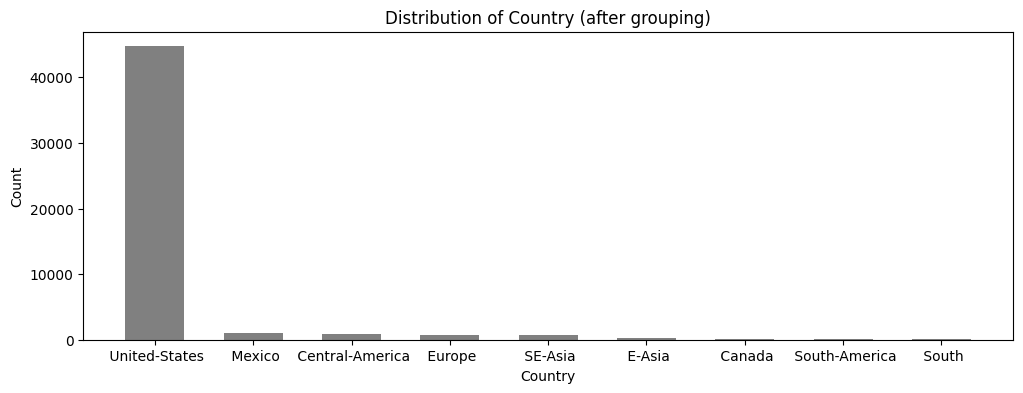

In [ ]:
# Plot the result after grouping
cty_x = x_data['Country'].value_counts(dropna=False).keys().to_list()
cty_cnt = x_data['Country'].value_counts(dropna=False).to_list()

plt.figure(figsize=(12,4))
plt.bar( cty_x, cty_cnt, color = 'grey', width = 0.6)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country (after grouping)')
plt.show()
plt.close()

<font color = blue> 8. *Relationship*

In [ ]:
# Observe the categories
x_data['Relationship'].value_counts(dropna=False)

 Husband           19716
 Not-in-family     12583
 Own-child          7581
 Unmarried          5125
 Wife               2331
 Other-relative     1506
Name: Relationship, dtype: int64

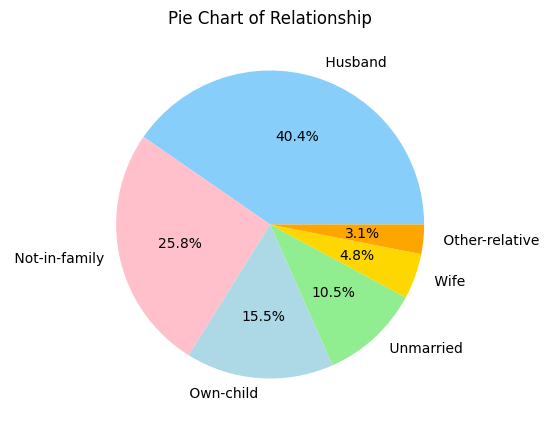

In [ ]:
# Plot the pie chart
rel_x = x_data['Relationship'].value_counts(dropna=False).keys().to_list()
rel_cnt = x_data['Relationship'].value_counts(dropna=False).to_list()
plt.figure(figsize=(5,5))
plt.pie( rel_cnt, labels = rel_x, colors = ['lightskyblue', 'pink', 'lightblue', 'lightgreen',
'gold','orange'],
autopct = "%1.1f%%",)
plt.title('Pie Chart of Relationship')
plt.show()
plt.close()

<font color = blue> 9. *Race*

In [ ]:
# Observe the categories
x_data['Race'].value_counts(dropna=False)

 White                 41762
 Black                  4685
 Asian-Pac-Islander     1519
 Amer-Indian-Eskimo      470
 Other                   406
Name: Race, dtype: int64

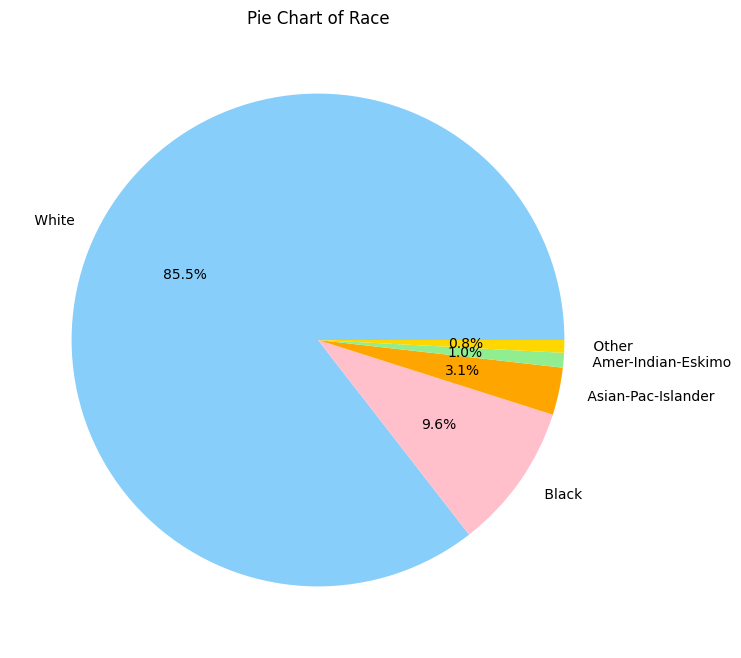

In [ ]:
# Plot the pie chart
race_x = x_data['Race'].value_counts(dropna=False).keys().to_list()
race_cnt = x_data['Race'].value_counts(dropna=False).to_list()
plt.figure(figsize=(8,8))
plt.pie( race_cnt, labels = race_x, colors = ['lightskyblue', 'pink', 'orange', 'lightgreen',
'gold'],
autopct = "%1.1f%%",)
plt.title('Pie Chart of Race')
plt.show()
plt.close()

<font color = blue> 10. *Sex*

In [ ]:
# Observe the categories
x_data['Sex'].value_counts(dropna=False)

 Male      32650
 Female    16192
Name: Sex, dtype: int64

It shows that the number of males is around twice of females. We need to know that if it's the common situation in both training and testing set.

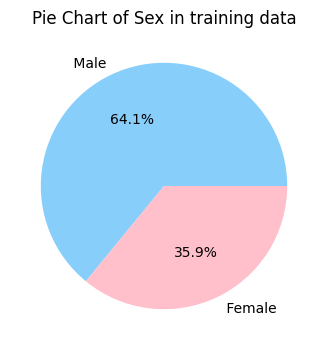

In [ ]:
# Plot the pie chart of Sex in training dset
sex_x = x_train['Sex'].value_counts(dropna=False).keys().to_list()
sex_cnt = x_train['Sex'].value_counts(dropna=False).to_list()
plt.figure(figsize=(4,4))
plt.pie( sex_cnt, labels = sex_x, colors = ['lightskyblue', 'pink'], autopct = "%1.1f%%",)
plt.title('Pie Chart of Sex in training data')
plt.show()
plt.close()

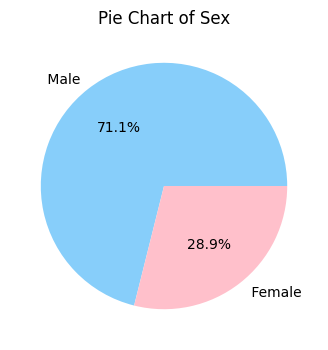

In [ ]:
# Plot the pie chart of Sex in testing set
sex_x = x_test['Sex'].value_counts(dropna=False).keys().to_list()
sex_cnt = x_test['Sex'].value_counts(dropna=False).to_list()
plt.figure(figsize=(4,4))
plt.pie( sex_cnt, labels = sex_x, colors = ['lightskyblue', 'pink'], autopct = "%1.1f%%",)
plt.title('Pie Chart of Sex')
plt.show()
plt.close()

Though there are some differences between two sets, I decided not to adjust since the difference isn't significant.

<font color = blue> 11. *Capital_gain* and *Capital_loss*

Since they are numerical data and I'll do standardization later, no additional analysis is conducted here.

<font color = blue> 12. *Target* --- imbalanced data

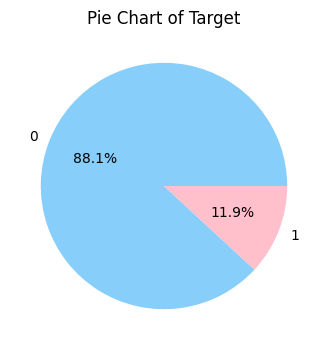

In [ ]:
# Plot the pie chart of Target in training set
target_x = [0,1]
num_1 = sum(y_train['Target'])
num_0 = len(y_train['Target']) - num_1
target_cnt = [ num_0, num_1]

plt.figure(figsize=(4,4))
plt.pie( target_cnt, labels = target_x, colors = ['lightskyblue', 'pink'], autopct = "%1.1f%%",)
plt.title('Pie Chart of Target')
plt.show()
plt.close()

The pie chart shows that the target distribution is "imbalanced".  
    Besides, after submitting "sub_try.csv", which with all target labeled 1, I got accuracy = 0.59 on Kaggle.  
    I reasonably guessed that the distribution of target in the testing set is not that imbalanced like in the training set.  
    Hence, we need to tackle **imbalanced data problem** later when building the model!

### <font color = blue>**Step 3: One-hot-encoding**

In [ ]:
# Transfer all categorical data using one-hot-encoding
x_data_ohe = pd.get_dummies( x_data, drop_first=True ) # "drop_first = True" can avoid colinearity!
pd.set_option('display.max_columns',47)
x_data_ohe.head(2)

,Age,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Edu*Hr,Workclass_ Others,Workclass_ Private,Workclass_ Self,Martial_Status_ Married,Martial_Status_ Never-married,Martial_Status_ Separated,Martial_Status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Country_ Central-America,Country_ E-Asia,Country_ Europe,Country_ Mexico,Country_ SE-Asia,Country_ South,Country_ South-America,Country_ United-States
0,38,9,0,0,50,450,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1,18,10,0,0,30,300,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### <font color = blue> **Step 4. Standardization**

First, separate data into train and test.

In [ ]:
# Split x_data_ohe back into training and testing data(as the same as the sets in the beginning)
x_train_ohe = x_data_ohe[:29514]
x_test_ohe = x_data_ohe[29514:]

# Ensure the number of samples is the same as original after splitting x_data_ohe
x_train_ohe.info()
x_test_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29514 entries, 0 to 29513
Columns: 44 entries, Age to Country_ United-States
dtypes: int64(6), uint8(38)
memory usage: 2.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19328 entries, 0 to 19327
Columns: 44 entries, Age to Country_ United-States
dtypes: int64(6), uint8(38)
memory usage: 1.7 MB


I standardized all numerical features, fit the scalar with the training dataset first, and then used the mean and standard deviations from the training dataset to adjust the testing dataset.

In [ ]:
# Use StandardScaler() to standardize all numerical features
# Fit it with training data and use it to tranform both training and testing data

from sklearn.preprocessing import StandardScaler
numerical_feature = ['Age', 'Education_Num', 'Capital_Gain','Capital_Loss','Hours_per_week', 'Edu*Hr']
scalar = StandardScaler().fit( x_train_ohe[numerical_feature] )
print(scalar.mean_, scalar.scale_)
x_train_ohe[ numerical_feature ] = scalar.transform( x_train_ohe[ numerical_feature ])
x_test_ohe[ numerical_feature ] = scalar.transform( x_test_ohe[ numerical_feature ])

[ 37.81290235   9.82770888 615.67120688  72.99769601  39.65087755
 393.34661517] [1.39662451e+01 2.50482289e+00 5.48778103e+03 3.67699095e+02
 1.24633482e+01 1.70061746e+02]


<ipython-input-38-ae744427cb99>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_ohe[ numerical_feature ] = scalar.transform( x_train_ohe[ numerical_feature ])
<ipython-input-38-ae744427cb99>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_ohe[ numerical_feature ] = scalar.transform( x_test_ohe[ numerical_feature ])


In [ ]:
# Ensure the means have been tranferred to nearly zero
x_train_ohe[numerical_feature].mean(axis = 0)

Age              -2.099320e-16
Education_Num     2.359327e-16
Capital_Gain     -1.203738e-18
Capital_Loss      4.213085e-17
Hours_per_week    2.831193e-16
Edu*Hr            1.752643e-16
dtype: float64

In [ ]:
# Convert dataframe into numpy array for keras model
x_train_np = x_train_ohe.values
x_test_np = x_test_ohe.values
y_train = y_train.values

In [ ]:
# Convert y_train into categorical data
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### **<font color = blue>Step 5: Building model**

In [ ]:
# Separate training set into partial training data and validation data
x_val = x_train_np[:6000]
partial_x_train = x_train_np[6000:]
y_val = y_train[:6000]
partial_y_train = y_train[6000:]

As mentioned above, we need to tackle imbalanced data problem.    
    I have two steps to complete that.  
     1. Adjust the weights on 0 and 1 targets in training set when training model  
     2. Adjust the validation set into a balanced data set

In [ ]:
# Combine features and target in validation set
all_val = np.hstack( (x_val, y_val ))
all_val.shape

(6000, 46)

In [ ]:
# Count the number of 1 and 0's in target
all_val_1 = all_val[ all_val[:,45] == 1] # The number of 1
all_val_0 = all_val[ all_val[:,44] == 1] # The number of 0
print( all_val_1.shape )
print( all_val_0.shape )

(719, 46)
(5281, 46)


In [ ]:
# Randomly select 719 samples from 0 set to get the same number as 1's set
index = np.random.choice( all_val_0.shape[0], size = all_val_1.shape[0], replace = False)
sel_val_0 = all_val_0[index]
print(sel_val_0.shape)

(719, 46)


In [ ]:
# Create the balanced validation set with the same number of 0 and 1 in it
val_bal = np.vstack( (all_val_1, sel_val_0))
x_val_bal = val_bal[:,:44]
y_val_bal = val_bal[:,44:46]
print(x_val_bal.shape, y_val_bal.shape)

(1438, 44) (1438, 2)


In [ ]:
import keras as keras
from keras import models
from keras import layers

In [ ]:
# Create neural network model by keras
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(44,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
# To tackle imbalanced data issue, I set the weight of 0 as 0.135 with respect to the weight of 1
# 0.135 comes from the approximate ratio of (targets=1)/(targets=0) in the training set

from sklearn.utils.class_weight import compute_class_weight

dic_weight = {0:0.135, 1:1}

In [ ]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'],)

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20, # Increase epoch to 20 to see if there's any improvement
batch_size=512,
validation_data=(x_val_bal, y_val_bal),
verbose=2, class_weight=dic_weight)

Epoch 1/20
46/46 - 2s - loss: 0.1267 - accuracy: 0.6801 - val_loss: 0.4306 - val_accuracy: 0.8053 - 2s/epoch - 54ms/step
Epoch 2/20
46/46 - 0s - loss: 0.0969 - accuracy: 0.7786 - val_loss: 0.4043 - val_accuracy: 0.8115 - 468ms/epoch - 10ms/step
Epoch 3/20
46/46 - 0s - loss: 0.0922 - accuracy: 0.7857 - val_loss: 0.3961 - val_accuracy: 0.8102 - 381ms/epoch - 8ms/step
Epoch 4/20
46/46 - 0s - loss: 0.0906 - accuracy: 0.7894 - val_loss: 0.3914 - val_accuracy: 0.8241 - 418ms/epoch - 9ms/step
Epoch 5/20
46/46 - 1s - loss: 0.0893 - accuracy: 0.7957 - val_loss: 0.3894 - val_accuracy: 0.8248 - 595ms/epoch - 13ms/step
Epoch 6/20
46/46 - 1s - loss: 0.0885 - accuracy: 0.7980 - val_loss: 0.3899 - val_accuracy: 0.8164 - 508ms/epoch - 11ms/step
Epoch 7/20
46/46 - 1s - loss: 0.0874 - accuracy: 0.7985 - val_loss: 0.3860 - val_accuracy: 0.8171 - 543ms/epoch - 12ms/step
Epoch 8/20
46/46 - 1s - loss: 0.0871 - accuracy: 0.8000 - val_loss: 0.3886 - val_accuracy: 0.8213 - 688ms/epoch - 15ms/step
Epoch 9/20
46

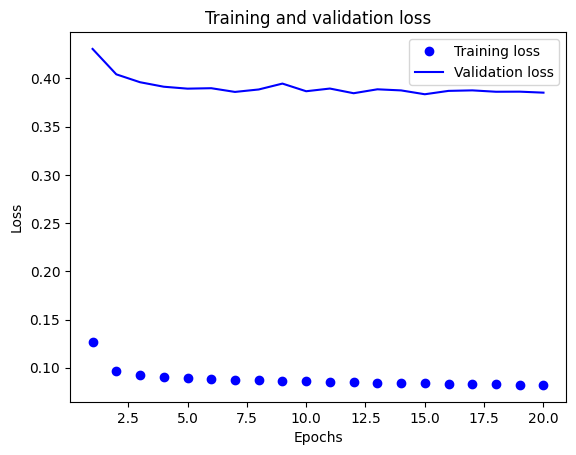

In [ ]:
# Plot the loss value
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

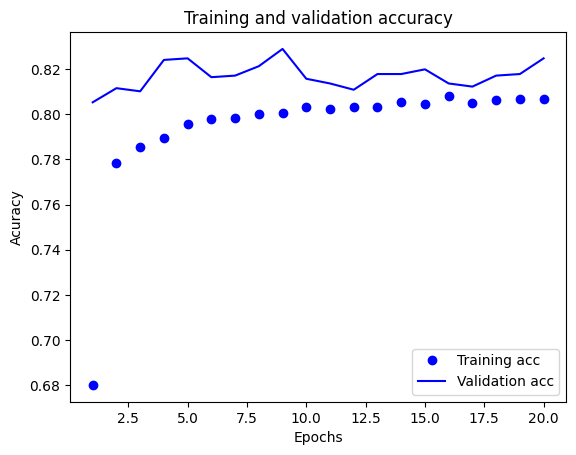

In [ ]:
# plot the accuracy rate
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acuracy')
plt.legend()
plt.show()

Though the overall accuracy rate decreased, the result on a balanced validation set was good and so was the accuracy rate on Kaggle. And because the loss curver was quite flat, I wanted to adjust the learning rate in the model.

<font color = blue> **DL finalized model and parameter initialization**

After several tries, I decided to build the model as following one. I added the layers by chance. I lowered the learning rate in order to stablize the curves. Also, I increased the batch
size due to the imbalanced Target data. I thought it could improve because with larger batch size, it contained more Target=1 data.

In [ ]:
# Create neural network model by keras
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(44,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
# To tackle unbalanced data issue, I set the weight of 0 as 0.135 with respect to the weight of 1
# 0.135 comes from the approximate ratio of (targets=1)/(targets=0) in the training set
dic_weight = {0:0.135, 1:1}

In [ ]:
# The decision of final learning rate is based on the loss curve and accuracy curve when adjusting model
keras.optimizers.RMSprop(learning_rate=0.000001)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],)

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=1024,
                    validation_data=(x_val_bal, y_val_bal),
                    verbose=2, class_weight=dic_weight)

Epoch 1/15
23/23 - 1s - loss: 0.1390 - accuracy: 0.6596 - val_loss: 0.5122 - val_accuracy: 0.7851 - 1s/epoch - 62ms/step
Epoch 2/15
23/23 - 0s - loss: 0.1096 - accuracy: 0.7621 - val_loss: 0.4351 - val_accuracy: 0.8060 - 139ms/epoch - 6ms/step
Epoch 3/15
23/23 - 0s - loss: 0.0979 - accuracy: 0.7885 - val_loss: 0.4115 - val_accuracy: 0.8115 - 149ms/epoch - 6ms/step
Epoch 4/15
23/23 - 0s - loss: 0.0938 - accuracy: 0.7910 - val_loss: 0.4031 - val_accuracy: 0.8129 - 140ms/epoch - 6ms/step
Epoch 5/15
23/23 - 0s - loss: 0.0921 - accuracy: 0.7931 - val_loss: 0.3956 - val_accuracy: 0.8108 - 138ms/epoch - 6ms/step
Epoch 6/15
23/23 - 0s - loss: 0.0909 - accuracy: 0.7928 - val_loss: 0.3924 - val_accuracy: 0.8129 - 139ms/epoch - 6ms/step
Epoch 7/15
23/23 - 0s - loss: 0.0900 - accuracy: 0.7951 - val_loss: 0.3964 - val_accuracy: 0.8150 - 155ms/epoch - 7ms/step
Epoch 8/15
23/23 - 0s - loss: 0.0896 - accuracy: 0.7956 - val_loss: 0.3922 - val_accuracy: 0.8185 - 124ms/epoch - 5ms/step
Epoch 9/15
23/23 -

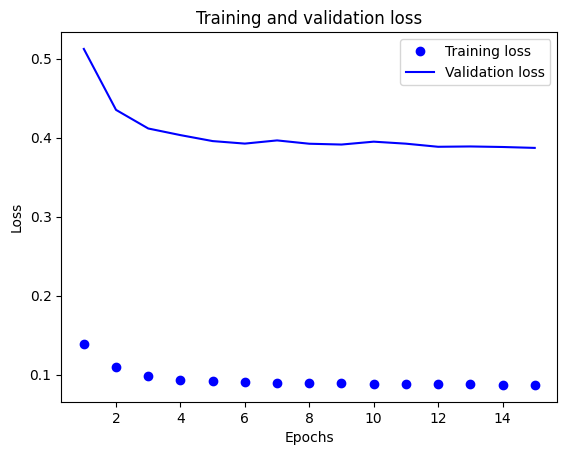

In [ ]:
# Plot the loss value
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

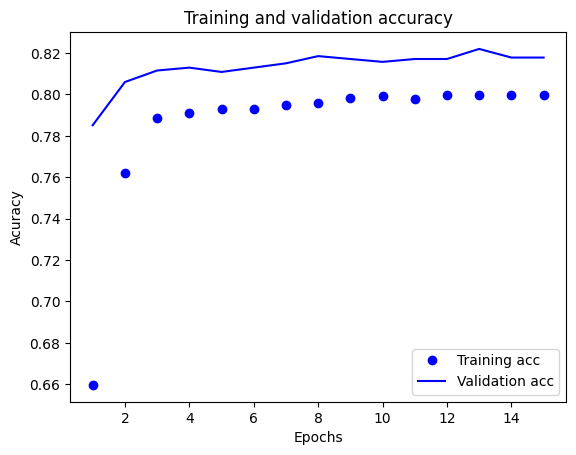

In [ ]:
# plot the accuracy rate
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acuracy')
plt.legend()
plt.show()

In [ ]:
# Predicts based on the test set
predictions = model.predict(x_test_np)
print(predictions)

604/604 [==============================] - 1s 1ms/step
[[0.99641174 0.00358829]
 [0.358562   0.64143795]
 [0.05764448 0.9423556 ]
 ...
 [0.50622016 0.49377978]
 [0.90992224 0.09007777]
 [0.00195023 0.9980497 ]]


In [ ]:
# Determine the final predictions by choosing the index of larger value in predictions array
# Eg. If a prediction is [0.1,0.9], then the final prediction is 1 since 0.9 > 0.1
predictions_final = np.argmax(predictions, axis = 1)

# Convert predictions array into dataframe and combine it with ID column for final submission
target = pd.DataFrame(predictions_final, dtype = int, columns = ['Target'])
sub = x_test['ID']
sub = pd.concat( [sub, target], axis=1 )

In [ ]:
# Export the predictions result into csv file
pd.DataFrame(sub).to_csv("sub_final.csv",index = False)

## <font color = red> **Part B - Prediction result**

In [ ]:
# Original predicted array produced from the model
print(predictions)

[[0.99641174 0.00358829]
 [0.358562   0.64143795]
 [0.05764448 0.9423556 ]
 ...
 [0.50622016 0.49377978]
 [0.90992224 0.09007777]
 [0.00195023 0.9980497 ]]


In [ ]:
# Transferred predictions from the predicted array
print(predictions_final)

[0 1 1 ... 0 0 1]


In [ ]:
print("Number of samples predicted as 1: ", predictions_final.sum())
print("Number of samples predicted as 0: ", len(predictions_final)-predictions_final.sum())

Number of samples predicted as 1:  9257
Number of samples predicted as 0:  10071


**Learning and conclusion:**

In the beginning, only a few data points were predicted as 1. After I adjusted weights, the outcome became more balanced and the accuracy rate on both public and pivate sets on Kaggle increased a lot to around 80%, showing that the key factor to build a good model in this competition is to be careful about the imbalanced data problem.